## panels for fig 1 

#### Figure Purpose: Give readers enough information about the dataset as a glance to decide if it is of interest to them. 

* electrode localizations
* unit distribution across patients, stratified by region
* overall unit information
* general stimulus information

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', )))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from collections import Counter, OrderedDict
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from nilearn.plotting import plot_markers

from config_colors import *
from config_paths import *
from config_plot_params import *
from nwb_io import *
from plot_patientwise_unit_distribution import *

# save panels directly to the relevant svg/ subdir
panel_save_dir = Path.cwd().parent.parent / "figure_generation" / "figure_data_overview" / "svg"

data_dir = NWB_data_dir

Loaded font name: Helvetica


In [2]:
## collect all units from all nwb files

i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_units = nwbfile.units.to_dataframe()
    df_units["unit_id"] = np.arange(0, len(df_units))

    df_units.insert(0, "patient_id", [patient_id] * len(df_units), )
    
    if i == 0:
        df_units_all = df_units.copy()
    else:
        df_units_all = pd.concat([df_units_all, df_units], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub14.nwb
  14


  3%|▎         | 1/29 [00:08<04:03,  8.70s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub20.nwb
  20


  7%|▋         | 2/29 [00:18<04:19,  9.62s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub23.nwb
  23


 10%|█         | 3/29 [00:30<04:36, 10.65s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub28.nwb
  28


 14%|█▍        | 4/29 [01:50<15:51, 38.07s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub30.nwb
  30


 17%|█▋        | 5/29 [02:59<19:38, 49.11s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub31.nwb
  31


 21%|██        | 6/29 [04:26<23:43, 61.91s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub33.nwb
  33


 24%|██▍       | 7/29 [06:17<28:38, 78.12s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub39.nwb
  39


 28%|██▊       | 8/29 [06:39<21:03, 60.15s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub41.nwb
  41


 31%|███       | 9/29 [06:59<15:53, 47.66s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub42.nwb
  42


 34%|███▍      | 10/29 [08:54<21:40, 68.43s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub44.nwb
  44


 38%|███▊      | 11/29 [09:22<16:49, 56.08s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub50.nwb
  50


 41%|████▏     | 12/29 [09:54<13:48, 48.71s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub52.nwb
  52


 45%|████▍     | 13/29 [11:37<17:20, 65.00s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub53.nwb
  53


 48%|████▊     | 14/29 [11:53<12:33, 50.20s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub60.nwb
  60


 52%|█████▏    | 15/29 [13:18<14:12, 60.87s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub61.nwb
  61


 55%|█████▌    | 16/29 [14:18<13:07, 60.61s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub64.nwb
  64


 59%|█████▊    | 17/29 [15:02<11:05, 55.46s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub65.nwb
  65


 62%|██████▏   | 18/29 [15:10<07:35, 41.37s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub66.nwb
  66


 66%|██████▌   | 19/29 [15:35<06:02, 36.24s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub68.nwb
  68


 69%|██████▉   | 20/29 [17:05<07:53, 52.56s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub73.nwb
  73


 72%|███████▏  | 21/29 [18:09<07:27, 55.91s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub83.nwb
  83


 76%|███████▌  | 22/29 [19:34<07:33, 64.77s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub87.nwb
  87


 79%|███████▉  | 23/29 [19:53<05:04, 50.81s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub88.nwb
  88


 83%|████████▎ | 24/29 [20:10<03:24, 40.93s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub89.nwb
  89


 86%|████████▌ | 25/29 [20:57<02:50, 42.72s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub90.nwb
  90


 90%|████████▉ | 26/29 [21:24<01:53, 37.93s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub92.nwb
  92


 93%|█████████▎| 27/29 [22:01<01:14, 37.50s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub96.nwb
  96


 97%|█████████▋| 28/29 [22:52<00:41, 41.53s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub98.nwb
  98


100%|██████████| 29/29 [23:01<00:00, 47.62s/it]


## raster plot

In [ ]:
pat = 42

spikes = df_units_all[df_units_all["patient_id"] == pat]["spike_times"]
spikes = np.array(spikes)

In [ ]:
minutes = 5
time_limit = minutes * 60 * 1000 

data = []
for unit in spikes:
    unit_ = []
    for s in unit:
        #if s >= onset and s <= offset:
        if s <= time_limit:
            unit_.append(s)
            
    data.append(np.array(unit_))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

ax.eventplot(data, linewidths=0.8, linelengths=.7, color='black', alpha=0.5)
ax.invert_yaxis()
ax.set_yticks([])
ax.set_yticklabels([])
ax.yaxis.set_ticks_position('none') 

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel("Time [5 minutes]", fontsize=labelsize, )
#ax.set_ylabel("Unit", fontsize=labelsize, labelpad=-15, )

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig(panel_save_dir / "raster.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "raster.svg", bbox_inches="tight", dpi=300)

plt.show()

## electrode localizations

In [3]:
i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_electrodes = nwbfile.electrodes.to_dataframe()
    df_electrodes.insert(0, "patient_id", [patient_id] * len(df_electrodes))
    
    if i == 0:
        df_electrodes_all = df_electrodes.copy()
    else:
        df_electrodes_all = pd.concat([df_electrodes_all, df_electrodes], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub14.nwb
  14


  3%|▎         | 1/29 [00:00<00:25,  1.12it/s]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub20.nwb
  20


  7%|▋         | 2/29 [00:02<00:32,  1.19s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub23.nwb
  23


 10%|█         | 3/29 [00:04<00:39,  1.52s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub28.nwb
  28


 14%|█▍        | 4/29 [00:06<00:47,  1.90s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub30.nwb
  30


 17%|█▋        | 5/29 [00:09<00:57,  2.38s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub31.nwb
  31


 21%|██        | 6/29 [00:14<01:11,  3.09s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub33.nwb
  33


 24%|██▍       | 7/29 [00:18<01:12,  3.28s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub39.nwb
  39


 28%|██▊       | 8/29 [00:19<00:59,  2.82s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub41.nwb
  41


 31%|███       | 9/29 [00:21<00:48,  2.43s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub42.nwb
  42


 34%|███▍      | 10/29 [00:23<00:44,  2.32s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub44.nwb
  44


 38%|███▊      | 11/29 [00:25<00:41,  2.30s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub50.nwb
  50


 41%|████▏     | 12/29 [00:27<00:35,  2.10s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub52.nwb
  52


 45%|████▍     | 13/29 [00:29<00:33,  2.09s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub53.nwb
  53


 48%|████▊     | 14/29 [00:31<00:29,  1.97s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub60.nwb
  60


 52%|█████▏    | 15/29 [00:32<00:26,  1.89s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub61.nwb
  61


 55%|█████▌    | 16/29 [00:35<00:27,  2.08s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub64.nwb
  64


 59%|█████▊    | 17/29 [00:37<00:23,  1.99s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub65.nwb
  65


 62%|██████▏   | 18/29 [00:38<00:19,  1.81s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub66.nwb
  66


 66%|██████▌   | 19/29 [00:45<00:32,  3.30s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub68.nwb
  68


 69%|██████▉   | 20/29 [00:52<00:40,  4.45s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub73.nwb
  73


 72%|███████▏  | 21/29 [00:56<00:34,  4.31s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub83.nwb
  83


 76%|███████▌  | 22/29 [01:01<00:31,  4.50s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub87.nwb
  87


 79%|███████▉  | 23/29 [01:04<00:25,  4.19s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub88.nwb
  88


 83%|████████▎ | 24/29 [01:08<00:20,  4.08s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub89.nwb
  89


 86%|████████▌ | 25/29 [01:13<00:17,  4.26s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub90.nwb
  90


 90%|████████▉ | 26/29 [01:16<00:11,  3.95s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub92.nwb
  92


 93%|█████████▎| 27/29 [01:19<00:07,  3.54s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub96.nwb
  96


 97%|█████████▋| 28/29 [01:22<00:03,  3.39s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub98.nwb
  98


100%|██████████| 29/29 [01:25<00:00,  2.96s/it]


In [15]:
df_electrodes_all_Others_renamed = df_electrodes_all.copy()

df_electrodes_all_Others_renamed["brain_region"].replace("PIC", "Other", inplace=True)
df_electrodes_all_Others_renamed["brain_region"].replace("FF", "Other", inplace=True)
df_electrodes_all_Others_renamed["brain_region"].replace("LG", "Other", inplace=True)
df_electrodes_all_Others_renamed["brain_region"].replace("PRC", "Other", inplace=True)

In [18]:
node_coords = []
for i, row in df_electrodes_all_Others_renamed.iterrows():
    node_coords.append(np.array([row.x, row.y, row.z]))

region_map = {
    "A": 2,
    "AH": 3,
    "MH": 3,
    "PH": 3, 
    "EC": 4,
    "PHC": 5,
    "APH": 5, 
    "MPH": 5, 
    "PPH": 5,
    "Other": 0
}

node_values = [region_map[r]+(np.random.random()) for r in df_electrodes_all_Others_renamed['brain_region']]


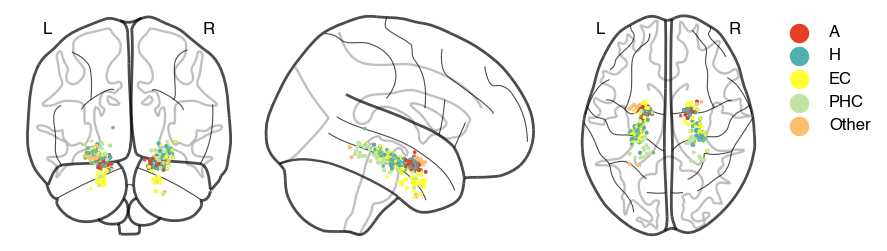

In [25]:
from matplotlib.colors import ListedColormap

colors = [
    '#fdbf6f',
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    # '#0A2463',
    # '#3B5738',
    # '#6E1A0D',

]

#cmap=sns.color_palette("Spectral", as_cmap=True)
cmap= ListedColormap(colors, name='brain_v2')
#plt.style.use('dark_background')
fig, ax = plt.subplots(1,1, figsize=(10,3))

node_size = 2.5
alpha = 0.8

plot_markers(
    node_values,    
    node_coords,     
    node_size=node_size,
    node_cmap=cmap,
    alpha=alpha,
    figure=fig,
    axes=ax,
    colorbar=False,
    black_bg=False,
)

norm = plt.Normalize(vmin=min(node_values), vmax=max(node_values))

handles = []
for region, value in region_map.items():
    if region in ["AH"]:
        region = "H"
        value = region_map["AH"]
    elif region in ["MH", "PH"]:
        continue

    if region in ["PHC"]:
        region = "PHC"
        value = region_map["PHC"]
    elif region in ["APH", "MPH", "PPH"]:
        continue

    color = cmap(norm(value))
    handle = plt.scatter([], [], color=color, s=100, label=region, edgecolor='w')    
    handles.append(handle)

ax.legend(handles=handles, title="", markerscale=1.5, bbox_to_anchor=(1.13, 1), fontsize=12, frameon=False)

plt.savefig(panel_save_dir / "localizations.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "localizations.svg", bbox_inches="tight", dpi=300)
plt.show()

## units across regions

In [26]:
raw_regions = df_units_all["brain_region"]

raw_regions = [r for r in raw_regions if r not in ["H", "T", "Ta", "Tb", "I"]]
units_regions = pd.Series(raw_regions).replace("AH","H").replace("MH", "H").replace("PH", "H").replace("APH","PHC").replace("MPH","PHC").replace("PPH","PHC").replace("PIC", "Other").replace("FF", "Other").replace("LG", "Other").replace("PRC", "Other")
data = Counter(units_regions)

order_list = ["A", "H", "EC", "PHC", "Other"]
ordered_data = OrderedDict((k, data[k]) for k in order_list)

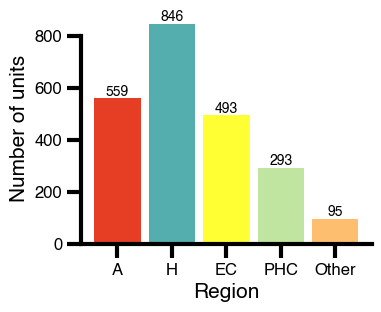

In [28]:
colors = [
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    '#fdbf6f',
]

bar_width = 0.85

fig, ax = plt.subplots(1,1, figsize=(3.75,3))
bars = ax.bar(ordered_data.keys(), ordered_data.values(), bar_width, color=colors, )


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adjust vertical position
            f'{int(height)}', ha='center', va='bottom', fontsize=ticksize)

ax.set_xlabel(f"Region", fontsize=labelsize)
ax.set_ylabel("Number of units", fontsize=labelsize)

sns.despine()
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(ymin, 800)

#plt.tight_layout()
plt.savefig(panel_save_dir / "units_by_region.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "units_by_region.svg", bbox_inches="tight", dpi=300)
plt.show()


## units across patient, stratified by regions

In [29]:
df_patient_overview = create_data_overview(data_dir)

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub14.nwb
14


  3%|▎         | 1/29 [00:28<13:29, 28.93s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub20.nwb
20


  7%|▋         | 2/29 [01:00<13:44, 30.54s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub23.nwb
23


 10%|█         | 3/29 [01:28<12:47, 29.51s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub28.nwb
28


 14%|█▍        | 4/29 [07:24<1:05:57, 158.31s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub30.nwb
30


 17%|█▋        | 5/29 [09:50<1:01:35, 153.97s/it]

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub31.nwb
31


 21%|██        | 6/29 [11:01<48:06, 125.51s/it]  

/media/al/Seagate/movies_dataset_nwb/finalized_localizations/sub33.nwb
33


 21%|██        | 6/29 [11:25<43:46, 114.21s/it]


KeyboardInterrupt: 

In [38]:
df_units_all_Other_filtered = df_units_all.copy()

df_units_all_Other_filtered["brain_region"].replace("PIC", "Other", inplace=True)
df_units_all_Other_filtered["brain_region"].replace("FF", "Other", inplace=True)
df_units_all_Other_filtered["brain_region"].replace("LG", "Other", inplace=True)
df_units_all_Other_filtered["brain_region"].replace("PRC", "Other", inplace=True)

In [43]:
data_collector = UnitRegionDataCollectorNWB(df_units_all_Other_filtered)
data_processor = UnitRegionDataProcessor(data_collector)
filtered_units, nm_units, filtered_regions = data_processor.filter_by_region(target_regions)
consolidated_regions = data_processor.consolidate_subregions(replacement_regions, filtered_regions)
data = format_regions_for_barplot(consolidated_regions, final_regions)

order_list = ["A", "H", "EC", "PHC", "Other",]
ordered_data = OrderedDict((k, data[k]) for k in order_list)

patients = np.arange(1, len(set(df_units_all_Other_filtered["patient_id"]))+1)
rows = order_list
columns = patients
n_rows = len(rows)
data_list = [ordered_data[key] for key in ordered_data]

colors = [
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    '#fdbf6f',
]

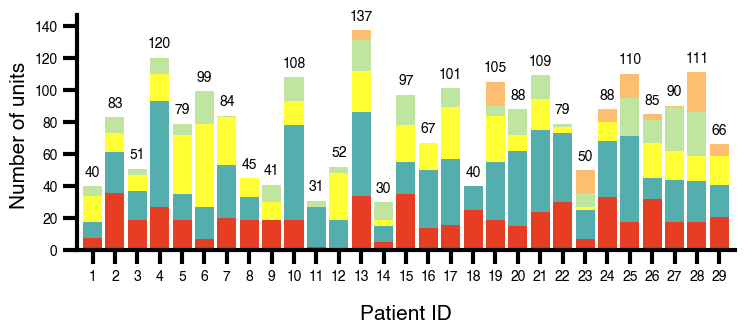

In [46]:
rc('axes', linewidth=axwidth)
rc('xtick.major', width=tickwidth, size=ticksize)
rc('xtick', labelsize=ticklabelsize)        
rc('ytick.major', width=tickwidth, size=ticksize)
rc('ytick', labelsize=ticklabelsize)

fig_wid = 8.5
fig_height = 3.
fig, ax = plt.subplots(1,1, figsize=(fig_wid, fig_height))

bar_width = 0.85

yticks = range(0, 141, 20)
index = np.arange(len(columns))
y_offset = np.zeros(len(columns))

cell_text = []
for i, row in enumerate(range(n_rows)):
    hbar = ax.bar(index, data_list[row], bar_width, align='center', bottom=y_offset,
                   label=rows[i], color=colors[row])

    if i == n_rows - 1:
        ax.bar_label(hbar, padding=5, fontsize=ticksize)
    y_offset = y_offset + data_list[row]

sns.despine()
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(ymin, ymax+3)
    
ax.set_xticks(range(len(patients)))
ax.set_xticklabels(patients, fontsize=ticksize)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=ticksize)

ax.set_xlabel("Patient ID", fontsize=labelsize, labelpad=15)
ax.set_ylabel("Number of units",fontsize=labelsize)
ax.margins(x=0.01)
#ax.legend(loc='upper right', bbox_to_anchor=(1.18, 1), fontsize=ticksize, frameon=False)

#plt.tight_layout()
plt.savefig(panel_save_dir / "unit_distribution_across_patients.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "unit_distribution_across_patients.svg", bbox_inches="tight", dpi=300)
plt.show()